# Кластеризация Iris

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import scipy.cluster.hierarchy as shc
import warnings
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
warnings.filterwarnings('ignore')
from sklearn.metrics import silhouette_score
from sklearn.metrics import calinski_harabasz_score
%matplotlib inline
from sklearn import metrics

In [3]:
from sklearn.datasets import load_iris
iris = load_iris()

In [4]:
iris_df = pd.DataFrame(iris.data)

In [5]:
iris_df

,0,1,2,3
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [6]:
iris_df.columns = iris.feature_names
iris_df['target'] = iris.target
iris_df['name'] = iris_df.target.apply(lambda x : iris.target_names[x])
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


__sepal length__ - длина 

__sepal width__ - ширина 

__petal length__ - длина лепестка

__petal width__ - ширина лепестка

__name__ - Название

In [7]:
iris_df.shape

(150, 6)

In [8]:
iris_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


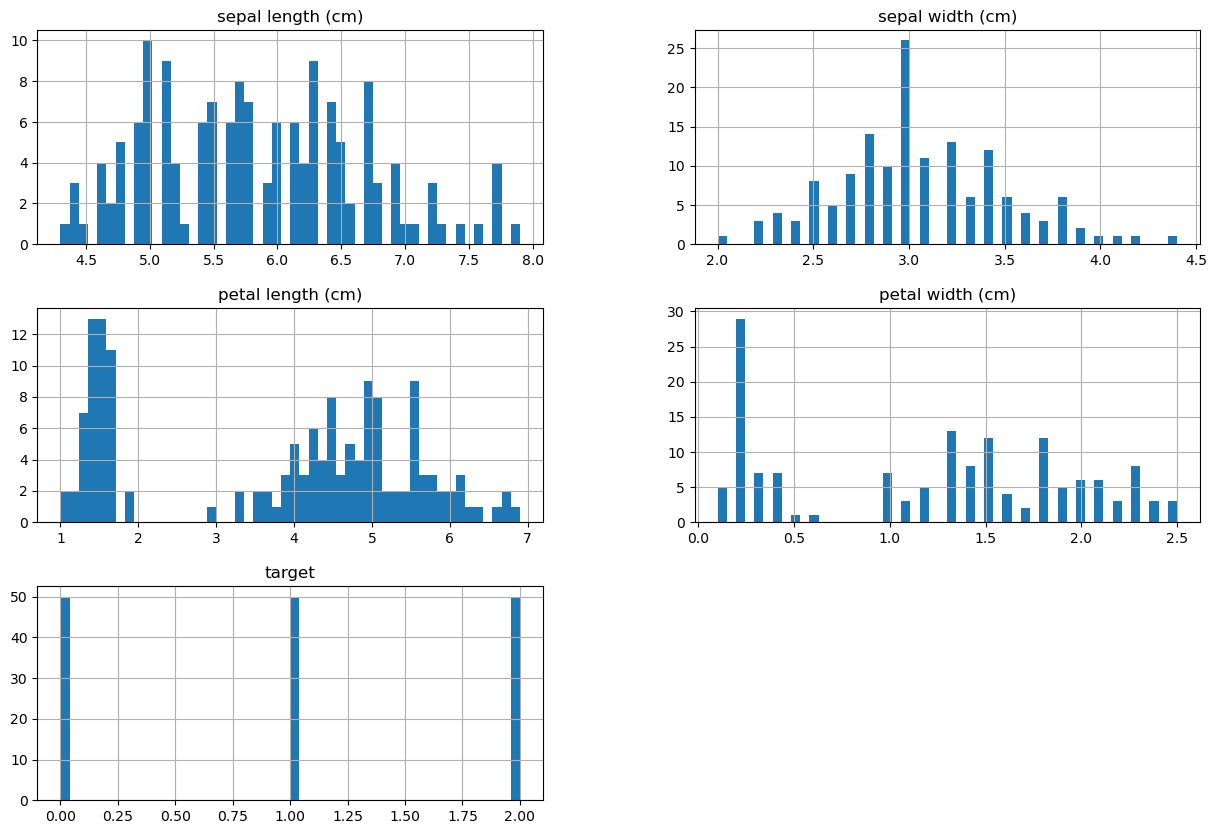

In [9]:
iris_df.hist(figsize = (15,10), bins = 50);
plt.show()

sepal length (cm) (длина чашелистика) - Приближено к нормальному с небольшим смещением вправо.

sepal width (cm) - Наиболее нормальное распределение среди всех.


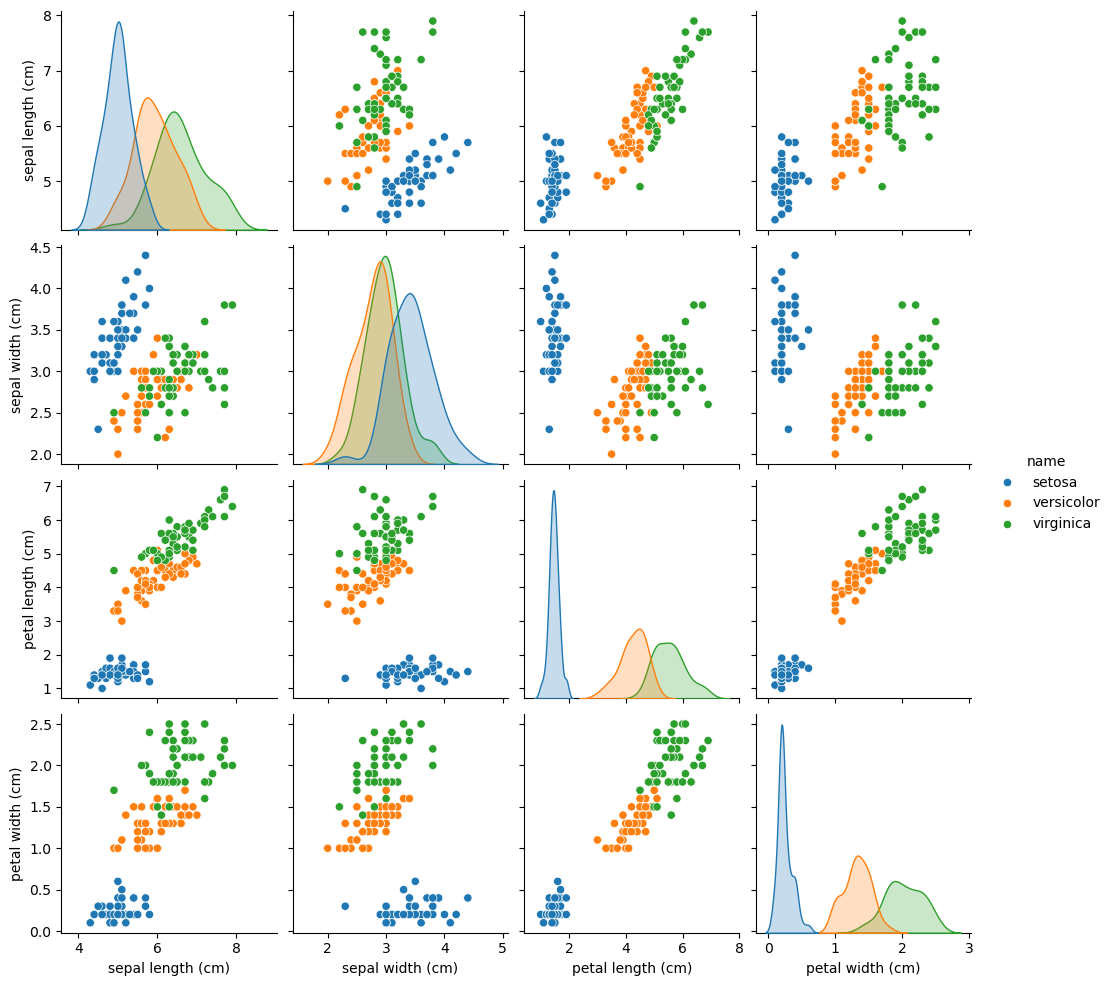

In [10]:
sns.pairplot(iris_df[['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)','name']], hue = 'name')
plt.show()

Опираясь на этот график можно выделить setosa который отличается по параметрам от остальных, другие же в свою очередь часто пересекаются на графике, что показывет на их схожесть

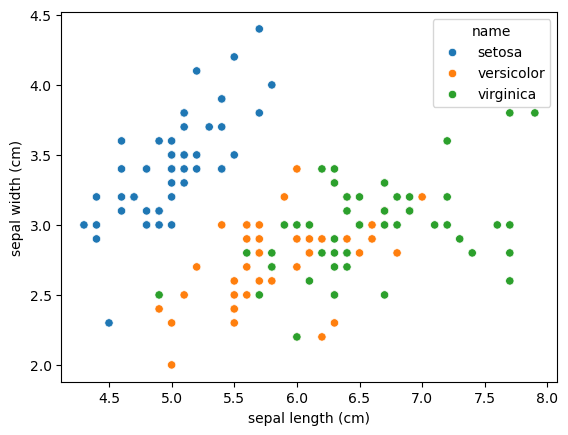

In [12]:
sns.scatterplot(data=iris_df, x="sepal length (cm)", y="sepal width (cm)", hue="name")
plt.show()

## Кластеризация

In [14]:
X = iris_df.drop(columns=['name'])
X = X.drop(columns=['target'])

In [15]:
X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


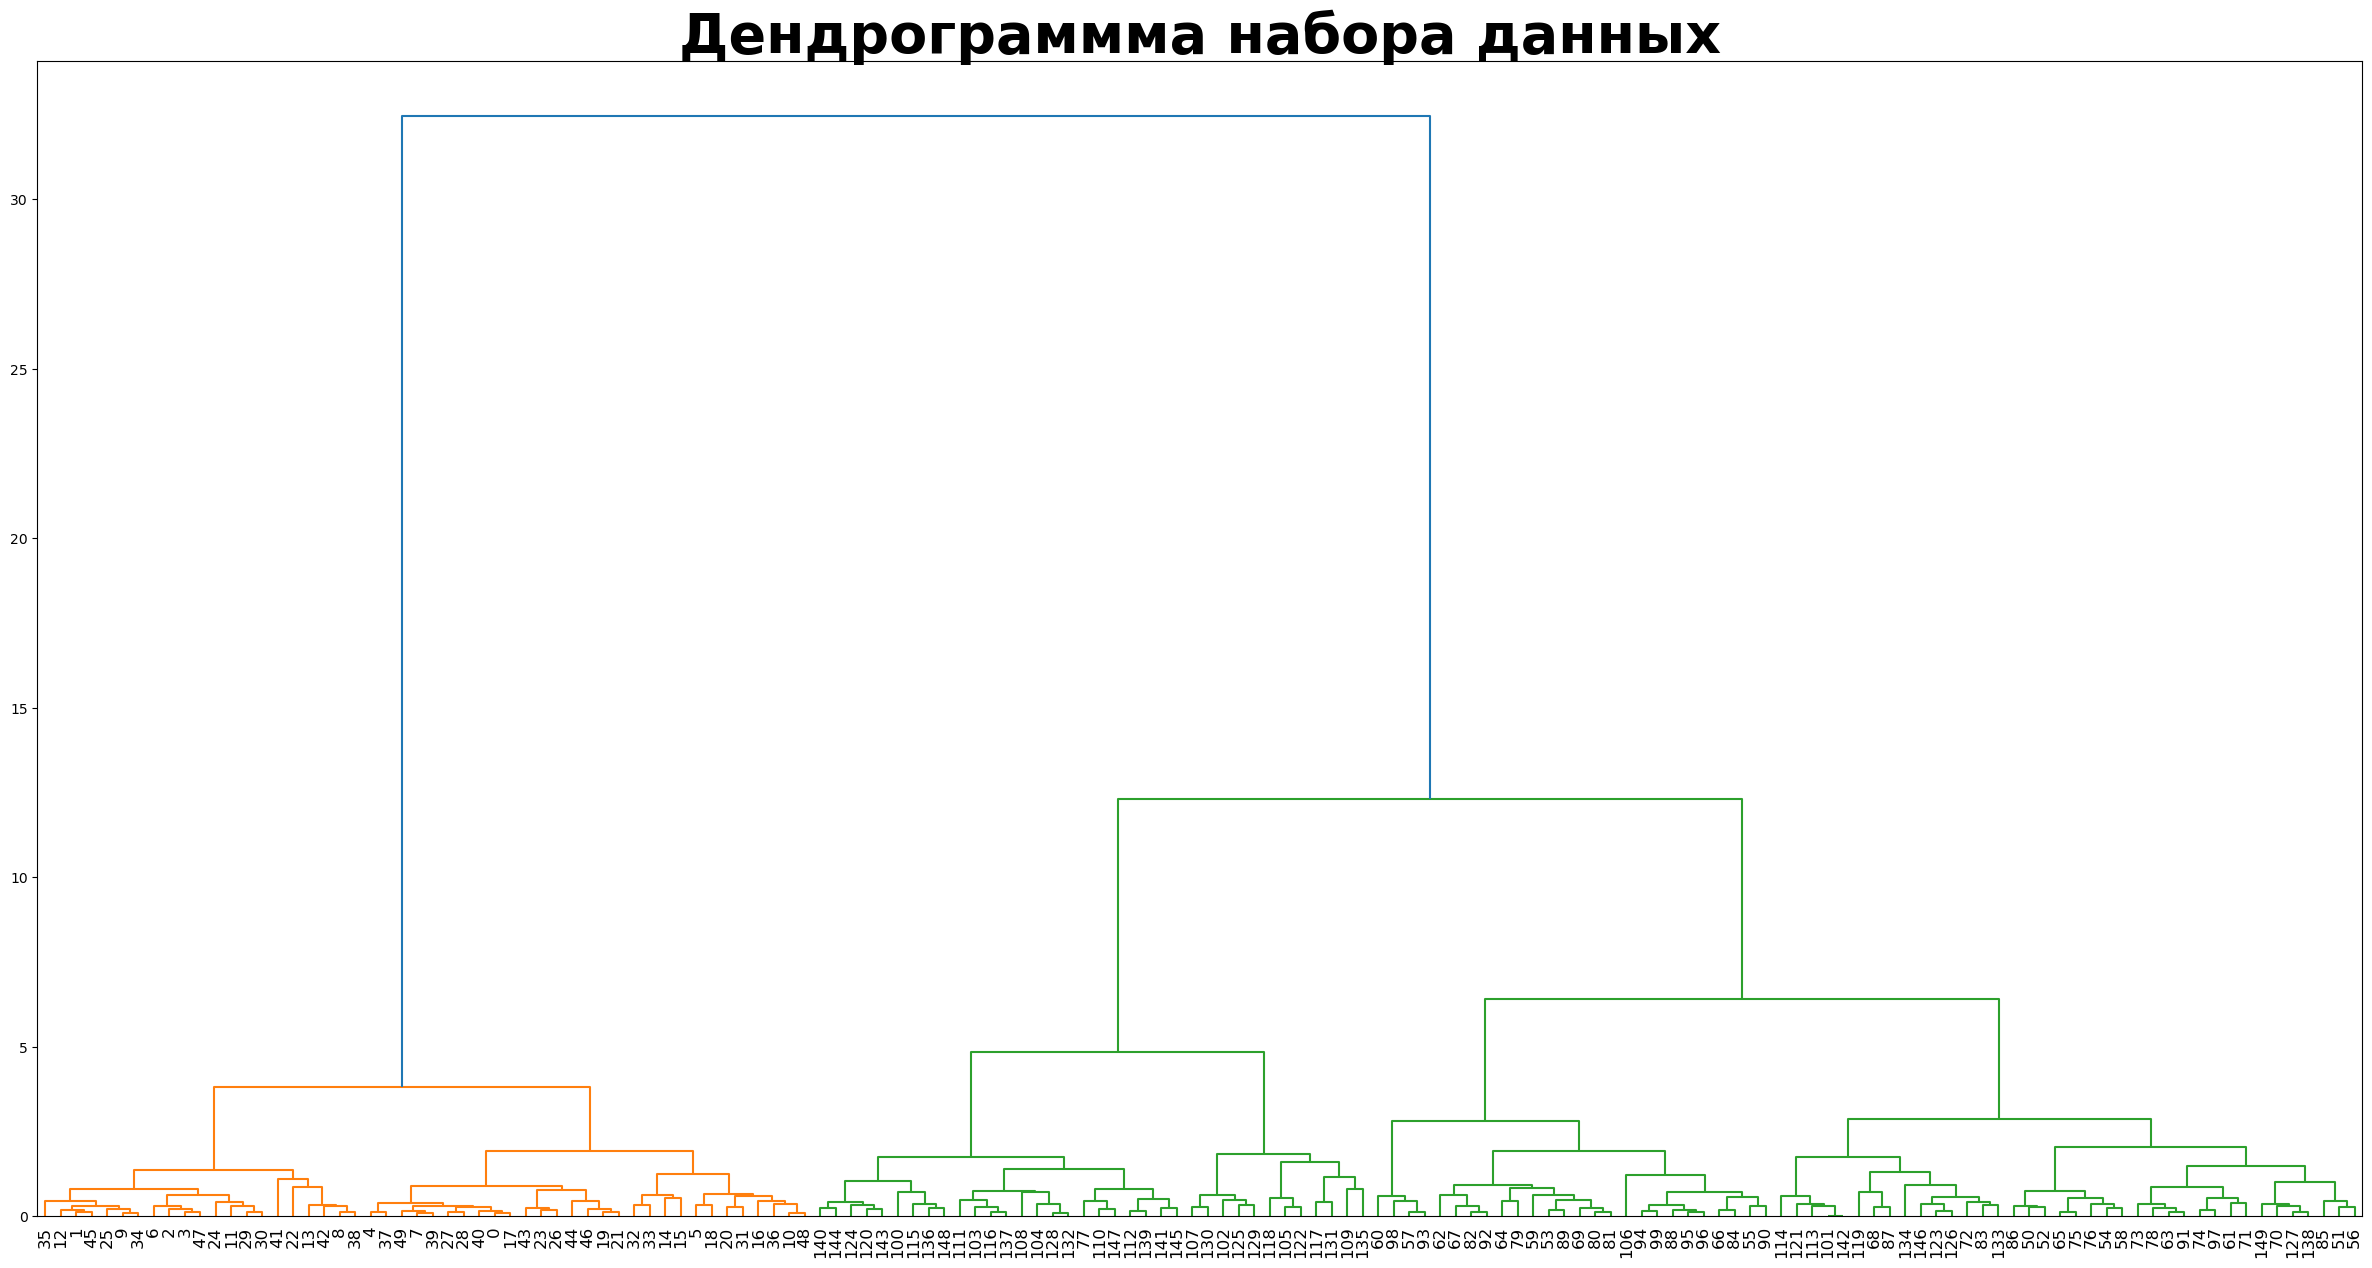

In [16]:
plt.figure(figsize=(30, 15))

shc.dendrogram(shc.linkage(X, method='ward'))
plt.xticks(fontsize = 12)
plt.title("Дендрограммма набора данных", fontweight = 'bold', fontsize = 40)
plt.show()

### Опираясь на диаграмму выделим 3 кластера

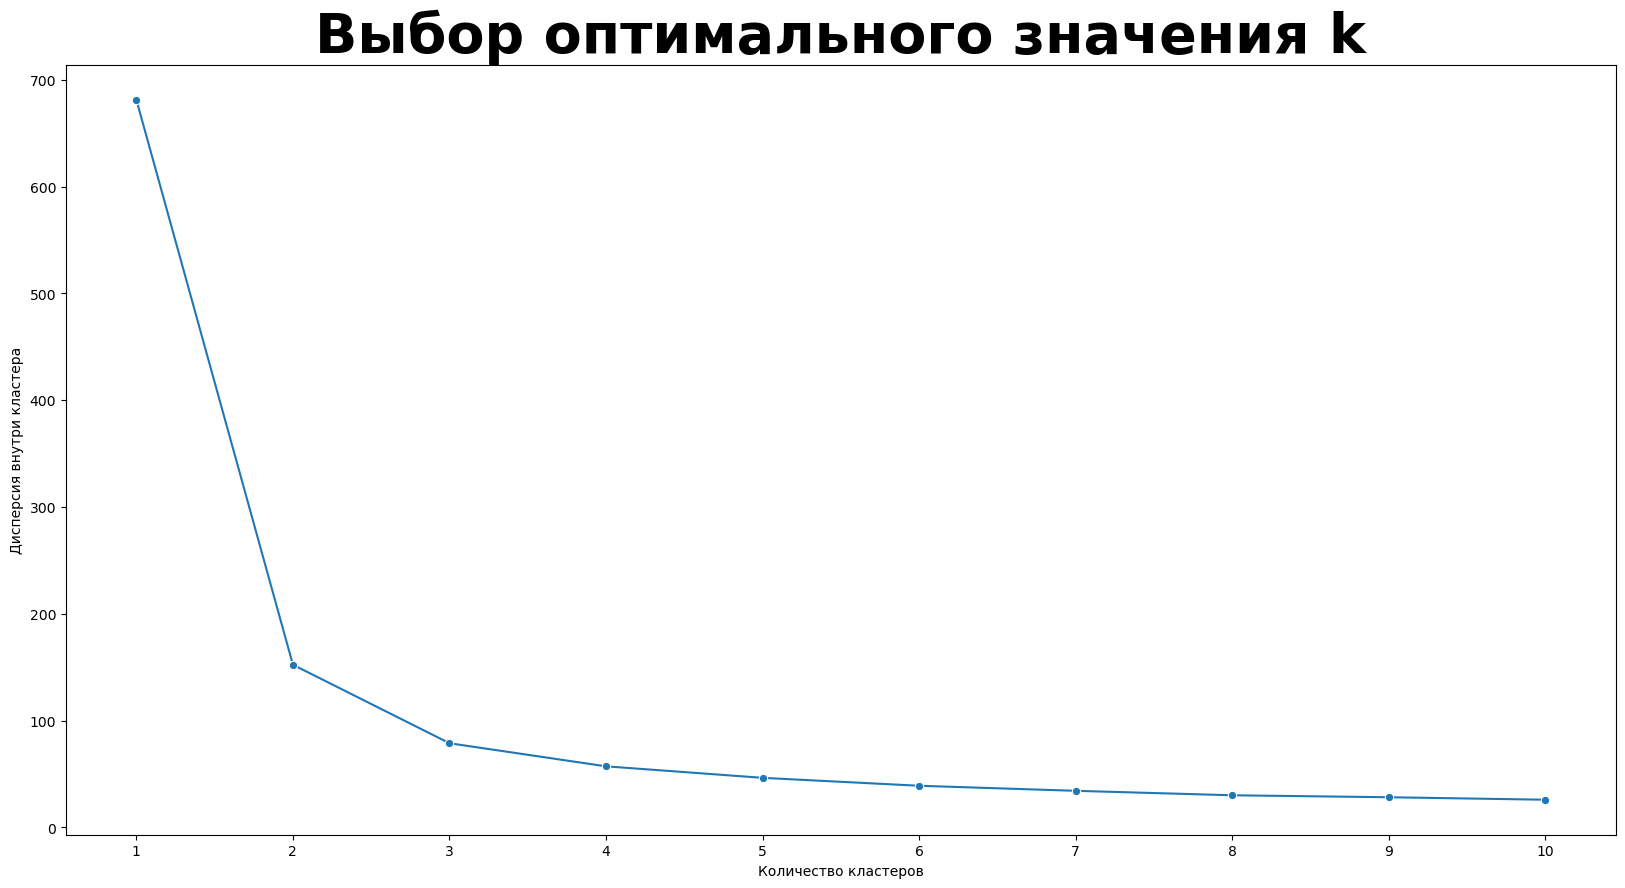

In [18]:
inertia_score = []

for k in range(1,11):
    kmeans = KMeans(n_clusters = k,
                    n_init = 10,
                    random_state = 42)
    kmeans.fit(X)
    inertia_score.append(kmeans.inertia_)
    
fig = plt.subplots(figsize = (20,10))
sns.lineplot(x = range(1,11),
             y = inertia_score,
             marker = 'o')
plt.title('Выбор оптимального значения k', fontsize = 40, fontweight = 'bold')
plt.xlabel('Количество кластеров')
plt.ylabel('Дисперсия внутри кластера')
plt.xticks(range(1,11))

plt.show()

После поcтроения данного графика можно скзаать что лучше разделять данный набор данных на 3 кластера

### Построение модели иерархической кластеризации

In [21]:
agg_cluster = AgglomerativeClustering(n_clusters = 3,
                                      linkage = 'ward')

In [22]:
agg_cluster.fit(X)

AgglomerativeClustering(n_clusters=3)

In [23]:
labels = agg_cluster.labels_
labels

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int64)

In [24]:
silhouette = silhouette_score(X, labels)
chi = calinski_harabasz_score(X, labels)
print('Силуэт', round(silhouette,3))
print('Variance Rarion Criterion', round(chi,3))

Силуэт 0.554
Variance Rarion Criterion 558.058


In [25]:
data_labels = pd.DataFrame()
data_labels['Agglomerative'] = labels
data_labels.sample(10)

,Agglomerative
115,2
73,0
137,2
111,2
45,1
129,2
91,0
65,0
57,0
41,1


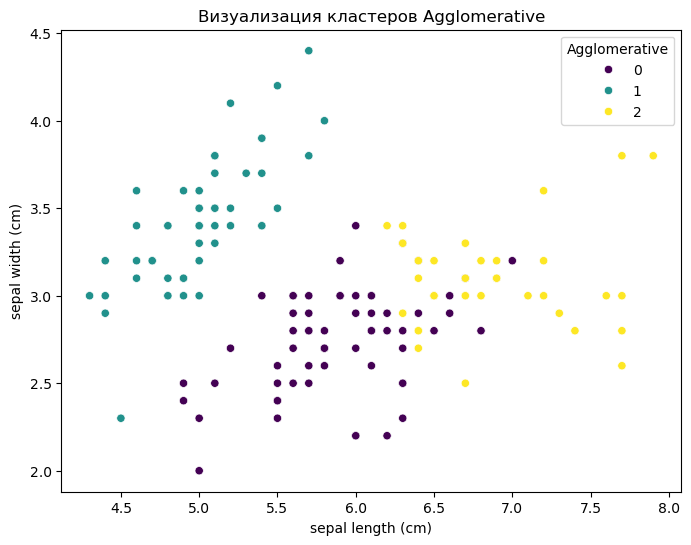

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.scatterplot(x=X.iloc[:, 0], y=X.iloc[:, 1], hue=data_labels['Agglomerative'], palette='viridis')
plt.title('Визуализация кластеров Agglomerative')
plt.show()

# K-means

### Построение модели KMeans

In [29]:
kmeans = KMeans(n_clusters = 3,
                n_init = 10,
                algorithm = 'elkan')

kmeans.fit(X)

KMeans(algorithm='elkan', n_clusters=3, n_init=10)

In [30]:
# Метки класстеров
labels = kmeans.labels_

centroids = kmeans.cluster_centers_

labels

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

In [31]:
silhouette = silhouette_score(X, labels)
chi = calinski_harabasz_score(X, labels)
print('Силуэт', round(silhouette,3))
print('Variance Rarion Criterion', round(chi,3))

Силуэт 0.553
Variance Rarion Criterion 561.628


In [32]:
data_labels['KMeans'] = labels
data_labels.sample(10)

,Agglomerative,KMeans
50,0,0
80,0,0
114,0,0
123,0,0
45,1,1
149,0,0
48,1,1
101,0,0
62,0,0
59,0,0


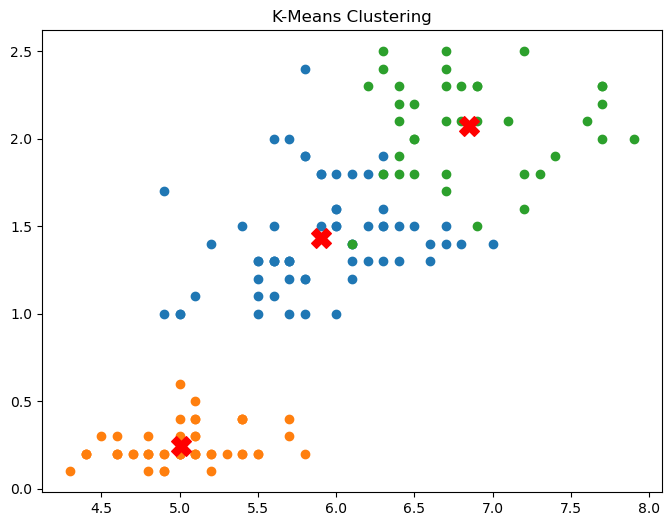

In [33]:
# Визуализация данных и центров кластеров
plt.figure(figsize=(8, 6))

# Визуализируем данные по кластерам
for i in range(3):
    plt.scatter(X.iloc[labels == i, 0], X.iloc[labels == i, 3])
plt.scatter(centroids[:, 0], centroids[:, 3], marker='X', s=200, color='red')

plt.title('K-Means Clustering')
plt.show()

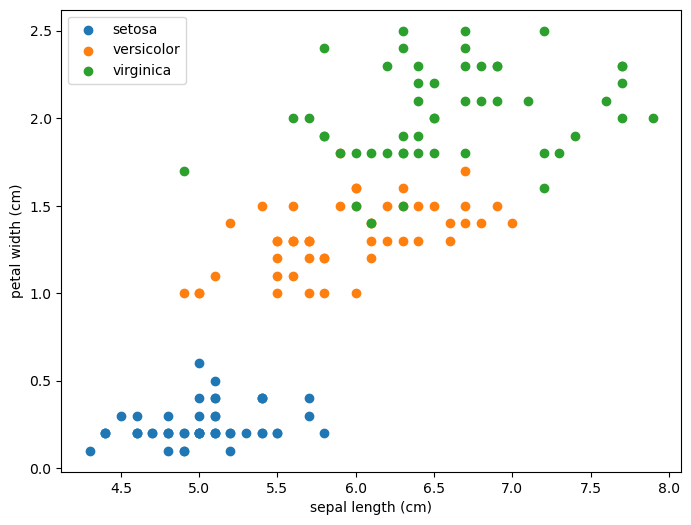

In [34]:
plt.figure(figsize=(8, 6))

for i in range(3):
    plt.scatter(iris_df.loc[iris_df['target'] == i, iris.feature_names[0]], 
                iris_df.loc[iris_df['target'] == i, iris.feature_names[3]], 
                label=iris.target_names[i])

plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[3])

plt.legend()
plt.show()

# Вывод

Первый график  Agglomerative . Здесь данные разделены на три группы, причем границы между кластерами выглядят менее четкими, особенно в местах, где точки разных цветов расположены близко друг к другу.
Второй график  K-Means, который явно показывает центры кластеров (обозначены красными крестами). Кластеры в этом случае более четко разделены.
В методе Agglomerative видно, что некоторые точки, которые могли бы принадлежать одной группе, оказались в разных кластерах. Это может быть связано с особенностями иерархической кластеризации, которая строит дерево слияний.
В K-Means группы выглядят более компактными, особенно если данные хорошо подходят для разбиения на равномерные кластеры.